# Regression

This is dataset containing over 21613 houses and their characteristics, the goal is to find the best model to predict a house’s price : 

1. Explore this dataset using what you have learned in data preprocessing and data visualization 

2. Write a paragraph selecting the most important features (feature selection). 

3. Split your dataset into a training set and a testing set. 

4. Apply Linear regression to your training set. 

5. Plot the linear regression. 

6. Measure the performance of linear regression using the testing set. 

7. Apply multi-linear regression and compare it to the linear model. 

8. Apply Polynomial regression and compare it to the linear and multilinear regression. 

Note: Every result has to be interpreted and justified (write your interpretations in a markdown).

## Loading libraries and data

In [4]:
%matplotlib inline

# Importing libraries.
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures 

np.random.seed(42)

# Loading data.
df = pd.read_csv('kc_house_data.csv', sep=',', encoding="ISO-8859-1")

## Exploring data stats

In [5]:
# Showing head - first five records.
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
# Showning infos about features.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
# Showing some statistics about numerical features.
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
# Locate missing values.
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
df_copy = df.copy()

Text(0.5, 1.0, 'sqft_above Histogram')

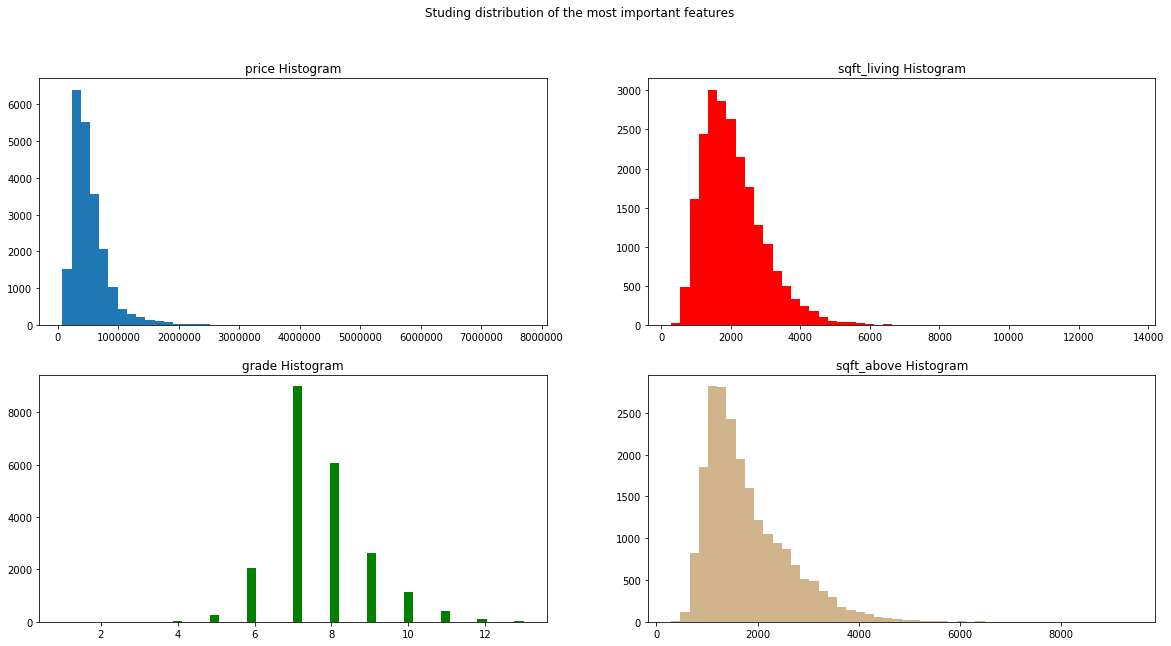

In [10]:
# Studying distribution of the most important features

n_bins = 50
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

fig.suptitle('Studing distribution of the most important features')
ax0, ax1, ax2, ax3 = axes.flatten()

ax0.hist(df_copy['price'], n_bins, histtype='bar')
ax0.set_title('price Histogram')

ax1.hist(df_copy['sqft_living'], n_bins, histtype='bar', color='red')
ax1.set_title('sqft_living Histogram')

ax2.hist(df_copy['grade'], n_bins, histtype='bar', color='green')
ax2.set_title('grade Histogram')

ax3.hist(df_copy['sqft_above'], n_bins, histtype='bar', color='tan')
ax3.set_title('sqft_above Histogram')

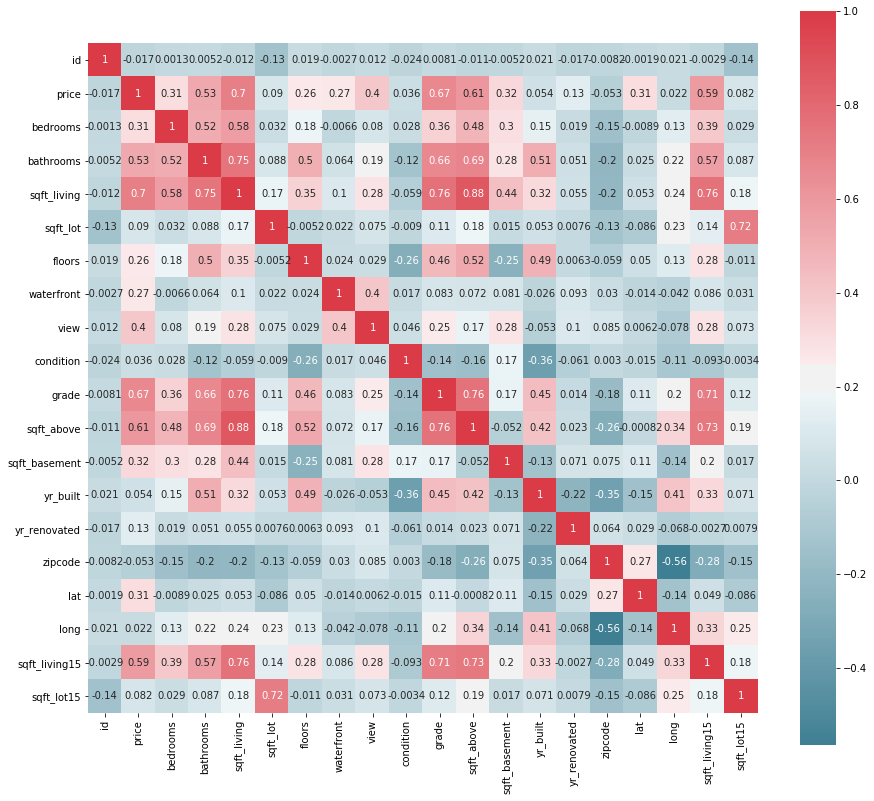

In [22]:
#corr_matrix = df_copy.corr()
#corr_matrix["price"].sort_values(ascending=False)

def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 15 , 15 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 10 }
        )
plot_correlation_map(df_copy)

## Feature selection

Étant donné que le fichier de données ne comporte aucune description, nous ne pouvons tiré aucune interprétation sur le champ DATE, nous devons le supprimer ainsi que le camp ID.
Selon la matrice de corrélation,  nous pouvons choisir les champs qui on une forte correlation linaire avec notre target PRICE, les champs sont : sqft_living, grade, sqft_above, sqft_living15,bathrooms.

In [13]:
df_clean = df_copy.drop(columns=["id","date","view","sqft_basement","bedrooms","lat","waterfront","floors",
                                 "yr_renovated","sqft_lot","sqft_lot15","yr_built","condition","long","zipcode"])

## Linear regression

In [14]:
y = df_clean["price"].values.reshape(-1, 1)
X = df_clean["sqft_above"].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

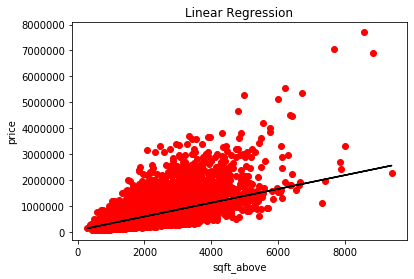

In [15]:
model1=LinearRegression() 
model1.fit(X_train,y_train)  
predicted=model1.predict(X_test) 
pred = model1.predict(X_train)

# ploting 
plt.scatter(X,y,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_above")
plt.plot(X, model1.predict(X), color="k")

In [16]:
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 92317660076.0689
R squared 0.360532811480355


## Multi-linear regression

In [17]:
X = df_clean.drop(columns=["price"])
y = df_clean["price"].values.reshape(-1, 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42) 

model2=LinearRegression()
model2.fit(X_train,y_train)
predicted=model2.predict(X_test)

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 66696085993.40548
R squared 0.5380086696269781


## Polynomial regression

In [18]:
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)

X_train_fit = poly.fit_transform(X_train)
lg.fit(X_train_fit, y_train)
X_test_ = poly.fit_transform(X_test)
predicted = lg.predict(X_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  62459784094.42599
R squared:  0.567352741636913
